In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np

c:\Users\11094\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# 训练集和测试集文件路径
train_path = r'D:\xjtufiles\3ee\DGA\datasets\DGA_data_add_cleaned_train.csv'
test_path = r'D:\xjtufiles\3ee\DGA\datasets\DGA_data_add_cleaned_test.csv'

# 预处理训练集
df_train = pd.read_csv(train_path)

df_train['h2'] = pd.to_numeric(df_train['h2'], errors='coerce')
df_train['ch4'] = pd.to_numeric(df_train['ch4'], errors='coerce')
df_train['c2h6'] = pd.to_numeric(df_train['c2h6'], errors='coerce')
df_train['c2h4'] = pd.to_numeric(df_train['c2h4'], errors='coerce')
df_train['c2h2'] = pd.to_numeric(df_train['c2h2'], errors='coerce')
df_train['act'] = pd.to_numeric(df_train['act'], errors='coerce')

df_train = df_train.reset_index(drop=True)  # 重置索引

# 预处理测试集
df_test = pd.read_csv(test_path)

df_test['h2'] = pd.to_numeric(df_test['h2'], errors='coerce')
df_test['ch4'] = pd.to_numeric(df_test['ch4'], errors='coerce')
df_test['c2h6'] = pd.to_numeric(df_test['c2h6'], errors='coerce')
df_test['c2h4'] = pd.to_numeric(df_test['c2h4'], errors='coerce')
df_test['c2h2'] = pd.to_numeric(df_test['c2h2'], errors='coerce')
df_test['act'] = pd.to_numeric(df_test['act'], errors='coerce')

df_test = df_test.reset_index(drop=True)  # 重置索引

# 现在，df_train 和 df_test 已经分别完成了预处理
print("训练集预处理完成，形状：", df_train.shape)
print("测试集预处理完成，形状：", df_test.shape)

训练集预处理完成，形状： (1436, 6)
测试集预处理完成，形状： (160, 6)


In [3]:
feature_cols = ['h2', 'ch4', 'c2h6', 'c2h4', 'c2h2']
# 确保特征列为数值类型 (df_train)
for col in feature_cols:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

# 确保目标列为整数类型 (df_train)
df_train['act'] = df_train['act'].astype(int)

print("训练集数据类型：")
print(df_train.dtypes)

# 确保特征列为数值类型 (df_test)
for col in feature_cols:
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')

# 确保目标列为整数类型 (df_test)
df_test['act'] = df_test['act'].astype(int)

print("\n测试集数据类型：")
print(df_test.dtypes)

训练集数据类型：
h2      float64
ch4     float64
c2h6    float64
c2h4    float64
c2h2    float64
act       int32
dtype: object

测试集数据类型：
h2      float64
ch4     float64
c2h6    float64
c2h4    float64
c2h2    float64
act       int32
dtype: object


# 原始数据

In [4]:
train_data = df_train

In [5]:
train_data.head()

,h2,ch4,c2h6,c2h4,c2h2,act
0,35.0,283.0,121.0,222.0,0.0001,5
1,56.6,366.5,161.5,519.3,1.4000,2
2,19.0,62.0,95.0,5.0,0.0001,4
3,65.0,61.0,16.0,143.0,3.0000,2
4,148.7,247.5,178.7,192.2,0.9000,4


In [6]:
label = 'act'
train_data[label].describe()

count    1436.000000
mean        3.127437
std         1.541003
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: act, dtype: float64

In [7]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20250308_155925"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       3.62 GB / 14.94 GB (24.2%)
Disk Space Avail:   133.29 GB / 244.14 GB (54.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         

[1000]	valid_set's multi_error: 0.166667


	0.8368	 = Validation score   (accuracy)
	2.98s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM ...
	0.8333	 = Validation score   (accuracy)
	2.4s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.8542	 = Validation score   (accuracy)
	2.36s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.8507	 = Validation score   (accuracy)
	1.55s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: CatBoost ...
	0.8264	 = Validation score   (accuracy)
	17.72s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.8438	 = Validation score   (accuracy)
	1.57s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.8403	 = Validation score   (accuracy)
	1.46s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: XGBoost ...
	0.816	 = Validation score   (accuracy)
	9.87s	 = Training   runtime
	0.01s	 = Valid

In [8]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 从 test_data 中提取特征和目标变量
test_data = df_test
y_test = test_data['act']

# 进行预测
y_pred = predictor.predict(test_data.drop(columns=[label]))

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的召回率
f1 = f1_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的f1
precision = precision_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的precision
confusion = confusion_matrix(y_test, y_pred)

# 打印评估指标
print("准确率：", accuracy)
print("召回率：", recall)
print("F1 分数：", f1)
print("精确率：", precision)
print("混淆矩阵：\n", confusion)

准确率： 0.8875
召回率： 0.8875
F1 分数： 0.8904080204216074
精确率： 0.896823275862069
混淆矩阵：
 [[20  0  6  0  0  0]
 [ 0 55  2  0  0  0]
 [ 5  0 16  0  0  0]
 [ 0  3  0 26  0  0]
 [ 0  0  0  0 14  0]
 [ 1  0  1  0  0 11]]


In [9]:
predictor.evaluate(test_data, silent=True)

{'accuracy': 0.8875,
 'balanced_accuracy': 0.8731255636881771,
 'mcc': 0.8566444647564339}

In [18]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 模型列表
models = [
    'CatBoost',
    'ExtraTreesEntr',
    'XGBoost',
    'RandomForestGini',
    'ExtraTreesGini',
    'RandomForestEntr',
    'WeightedEnsemble_L2',
    'LightGBMLarge',
    'LightGBMXT',
    'LightGBM',
    'NeuralNetTorch',
    'NeuralNetFastAI',
    'KNeighborsDist',
    'KNeighborsUnif'
]

# 用于存储结果的列表
results = []

# 遍历所有模型
for model in models:
    # 进行预测
    y_pred = predictor.predict(test_data, model=model)
    y_test = test_data['act']

    # 计算评估指标
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    # 将结果添加到列表中
    results.append({
        'Model': model,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision,
        'Confusion Matrix': confusion
    })

# 将结果转换为 DataFrame
df_results = pd.DataFrame(results)

# 保存结果到 CSV 文件
df_results.to_csv(r'D:\xjtufiles\3ee\DGA\results\original_result.csv', index=False)

print("所有模型的评估结果已保存")

所有模型的评估结果已保存


In [ ]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.89375,0.826389,accuracy,0.051987,0.004999,14.046545,0.051987,0.004999,14.046545,1,True,8
1,ExtraTreesEntr,0.89375,0.840278,accuracy,0.238987,0.134983,1.450976,0.238987,0.134983,1.450976,1,True,10
2,XGBoost,0.88750,0.815972,accuracy,0.152904,0.006998,1.781110,0.152904,0.006998,1.781110,1,True,11
3,RandomForestGini,0.88750,0.854167,accuracy,0.224515,0.134745,1.514286,0.224515,0.134745,1.514286,1,True,6
4,ExtraTreesGini,0.88750,0.843750,accuracy,0.249062,0.134575,1.638796,0.249062,0.134575,1.638796,1,True,9
5,RandomForestEntr,0.88750,0.850694,accuracy,0.269929,0.179665,1.637594,0.269929,0.179665,1.637594,1,True,7
6,WeightedEnsemble_L2,0.88750,0.857639,accuracy,0.463583,0.248732,5.492348,0.007999,0.003003,0.284625,2,True,14
7,LightGBMLarge,0.88125,0.829861,accuracy,0.133726,0.026997,4.013716,0.133726,0.026997,4.013716,1,True,13
8,LightGBMXT,0.88125,0.836806,accuracy,0.231069,0.110984,3.693437,0.231069,0.110984,3.693437,1,True,4
9,LightGBM,0.86250,0.833333,accuracy,0.142108,0.045002,2.730601,0.142108,0.045002,2.730601,1,True,5


In [ ]:
import pandas as pd

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 获取 leaderboard
leaderboard = predictor.leaderboard(test_data)

# 保存 leaderboard 到 CSV 文件
leaderboard.to_csv(r'D:\xjtufiles\3ee\DGA\results\original_run_info.csv', index=False)

print("leaderboard 已保存")

leaderboard 已保存到


# 三比值法：C2H2/C2H4,CH4/H2,C2H6/CH4,C2H4/C2H6

In [22]:
# 示例：使用SMOTE + XGBoost
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

trinomial_train = df_train.copy()

# 生成三比值特征 h2	ch4	c2h6 c2h4 c2h2
trinomial_train['ch4/h2'] = trinomial_train['ch4'] / (trinomial_train['h2'] + 1e-6)  # 比值1为 CH4 与 H2 的比值
trinomial_train['c2h6/ch4'] = trinomial_train['c2h6'] / (trinomial_train['ch4'] + 1e-6) # 比值2为 C2H6 与 CH4 的比值
trinomial_train['c2h4/c2h6'] = trinomial_train['c2h4'] / (trinomial_train['c2h6'] + 1e-6) # 比值3为 C2H4 与 C2H6 的比值
trinomial_train['c2h2/c2h4'] = trinomial_train['c2h2'] / (trinomial_train['c2h4'] + 1e-6) # 比值4为 C2H2 与 C2H4 的比值

trinomial_test = df_test.copy()

# 生成三比值特征 h2	ch4	c2h6 c2h4 c2h2
trinomial_test['ch4/h2'] = trinomial_test['ch4'] / (trinomial_test['h2'] + 1e-6)  # 比值1为 CH4 与 H2 的比值
trinomial_test['c2h6/ch4'] = trinomial_test['c2h6'] / (trinomial_test['ch4'] + 1e-6) # 比值2为 C2H6 与 CH4 的比值
trinomial_test['c2h4/c2h6'] = trinomial_test['c2h4'] / (trinomial_test['c2h6'] + 1e-6) # 比值3为 C2H4 与 C2H6 的比值
trinomial_test['c2h2/c2h4'] = trinomial_test['c2h2'] / (trinomial_test['c2h4'] + 1e-6) # 比值4为 C2H2 与 C2H4 的比值
trinomial_test

,h2,ch4,c2h6,c2h4,c2h2,act,ch4/h2,c2h6/ch4,c2h4/c2h6,c2h2/c2h4
0,2.7,135.4,93.5,174.700,0.0000,5,50.148130,0.690547,1.868449,0.000000
1,195.9,14.5,11.6,2.400,0.0001,6,0.074017,0.800000,0.206897,0.000042
2,980.0,73.0,58.0,12.000,0.0001,6,0.074490,0.794521,0.206897,0.000008
3,8.0,316.0,21.0,21.000,5.0000,2,39.499995,0.066456,1.000000,0.238095
4,86.0,277.0,63.0,338.000,0.0010,2,3.220930,0.227437,5.365079,0.000003
...,...,...,...,...,...,...,...,...,...,...
155,16.0,87.0,30.0,395.000,75.0000,2,5.437500,0.344828,13.166666,0.189873
156,39.8,125.0,112.0,380.000,0.0000,2,3.140703,0.896000,3.392857,0.000000
157,86.0,110.0,7.0,92.000,18.0000,2,1.279070,0.063636,13.142855,0.195652
158,12.0,28.0,102.0,3.000,0.0010,4,2.333333,3.642857,0.029412,0.000333


In [23]:
trinomial_train_data = trinomial_train

In [24]:
trinomial_train_data.head()

,h2,ch4,c2h6,c2h4,c2h2,act,ch4/h2,c2h6/ch4,c2h4/c2h6,c2h2/c2h4
0,35.0,283.0,121.0,222.0,0.0001,5,8.085714,0.427562,1.834711,4.504504e-07
1,56.6,366.5,161.5,519.3,1.4000,2,6.475265,0.440655,3.215480,2.695937e-03
2,19.0,62.0,95.0,5.0,0.0001,4,3.263158,1.532258,0.052632,2.000000e-05
3,65.0,61.0,16.0,143.0,3.0000,2,0.938462,0.262295,8.937499,2.097902e-02
4,148.7,247.5,178.7,192.2,0.9000,4,1.664425,0.722020,1.075546,4.682622e-03


In [25]:
label = 'act'
trinomial_train_data[label].describe()

count    1436.000000
mean        3.127437
std         1.541003
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: act, dtype: float64

In [26]:
predictor_trinomial = TabularPredictor(label=label).fit(trinomial_train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20250308_165521"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       4.36 GB / 14.94 GB (29.2%)
Disk Space Avail:   131.66 GB / 244.14 GB (53.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         

In [27]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 从 test_data 中提取特征和目标变量
trinomial_test_data = trinomial_test
y_test = trinomial_test_data['act']

# 进行预测
y_pred = predictor_trinomial.predict(trinomial_test_data.drop(columns=[label]))

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的召回率
f1 = f1_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的f1
precision = precision_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的precision
confusion = confusion_matrix(y_test, y_pred)

# 打印评估指标
print("准确率：", accuracy)
print("召回率：", recall)
print("F1 分数：", f1)
print("精确率：", precision)
print("混淆矩阵：\n", confusion)

准确率： 0.85625
召回率： 0.85625
F1 分数： 0.8611497220875828
精确率： 0.8714514652014653
混淆矩阵：
 [[20  0  6  0  0  0]
 [ 1 54  1  1  0  0]
 [ 7  0 14  0  0  0]
 [ 1  2  1 25  0  0]
 [ 0  0  0  0 14  0]
 [ 1  0  2  0  0 10]]


In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 模型列表
models = [
    'CatBoost',
    'ExtraTreesEntr',
    'XGBoost',
    'RandomForestGini',
    'ExtraTreesGini',
    'RandomForestEntr',
    'WeightedEnsemble_L2',
    'LightGBMLarge',
    'LightGBMXT',
    'LightGBM',
    'NeuralNetTorch',
    'NeuralNetFastAI',
    'KNeighborsDist',
    'KNeighborsUnif'
]

# 用于存储结果的列表
results = []

# 遍历所有模型
for model in models:
    # 进行预测
    y_pred = predictor_trinomial.predict(trinomial_test_data, model=model)
    y_test = trinomial_test_data['act']

    # 计算评估指标
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    # 将结果添加到列表中
    results.append({
        'Model': model,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision,
        'Confusion Matrix': confusion
    })

# 将结果转换为 DataFrame
df_results = pd.DataFrame(results)

# 保存结果到 CSV 文件
df_results.to_csv(r'D:\xjtufiles\3ee\DGA\results\trinomial_result.csv', index=False)

print("所有模型的评估结果已保存")

所有模型的评估结果已保存


In [28]:
predictor_trinomial.evaluate(trinomial_test_data, silent=True)

{'accuracy': 0.85625,
 'balanced_accuracy': 0.8357609319496797,
 'mcc': 0.8173010056319391}

In [30]:
predictor_trinomial.leaderboard(trinomial_test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesGini,0.89375,0.840278,accuracy,0.229070,0.159546,1.598973,0.229070,0.159546,1.598973,1,True,9
1,ExtraTreesEntr,0.88750,0.843750,accuracy,0.338120,0.183425,1.824663,0.338120,0.183425,1.824663,1,True,10
2,LightGBMXT,0.86875,0.868056,accuracy,0.153356,0.042747,3.957719,0.153356,0.042747,3.957719,1,True,4
3,RandomForestEntr,0.86875,0.850694,accuracy,0.200021,0.151189,1.849223,0.200021,0.151189,1.849223,1,True,7
4,RandomForestGini,0.86250,0.854167,accuracy,0.212447,0.153593,1.657642,0.212447,0.153593,1.657642,1,True,6
5,LightGBM,0.85625,0.875000,accuracy,0.116276,0.017398,1.990308,0.116276,0.017398,1.990308,1,True,5
6,WeightedEnsemble_L2,0.85625,0.875000,accuracy,0.126864,0.017398,2.238632,0.010589,0.000000,0.248324,2,True,14
7,XGBoost,0.85625,0.868056,accuracy,0.135740,0.026505,4.180095,0.135740,0.026505,4.180095,1,True,11
8,LightGBMLarge,0.85625,0.864583,accuracy,0.258111,0.086687,7.760642,0.258111,0.086687,7.760642,1,True,13
9,CatBoost,0.85000,0.854167,accuracy,0.017259,0.000000,19.341148,0.017259,0.000000,19.341148,1,True,8


In [31]:
import pandas as pd

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 获取 leaderboard
leaderboard = predictor_trinomial.leaderboard(trinomial_test_data)

# 保存 leaderboard 到 CSV 文件
leaderboard.to_csv(r'D:\xjtufiles\3ee\DGA\results\trinomial_run_info.csv', index=False)

print("leaderboard 已保存")

leaderboard 已保存


# 大卫三角法：C2H2/C2H4,CH4/H2,C2H6/C2H2

In [32]:
import pandas as pd
import numpy as np

# 假设 X 是一个 Pandas DataFrame，包含 h2, ch4, c2h6, c2h4, c2h2 列

train_david = df_train.copy()
test_david = df_test.copy()

def david_triangle_features(X):
    """
    根据大卫三角法扩展特征矩阵。

    Args:
        X (pd.DataFrame): 包含 h2, ch4, c2h6, c2h4, c2h2 列的特征矩阵。

    Returns:
        pd.DataFrame: 扩展后的特征矩阵。
    """

    # 计算比值
    R1 = X['c2h2'] / X['c2h4']
    R2 = X['ch4'] / X['h2']
    R3 = X['c2h6'] / X['c2h2']

    # 处理异常值
    R1 = R1.replace([np.inf, -np.inf], 0).fillna(0)
    R2 = R2.replace([np.inf, -np.inf], 0).fillna(0)
    R3 = R3.replace([np.inf, -np.inf], 0).fillna(0)

    # 添加到特征矩阵
    X['R1: C2H2/C2H4'] = R1
    X['R2: CH4/H2'] = R2
    X['R3: C2H6/C2H2'] = R3

    return X

# 示例用法
# 假设 X_train 和 X_test 是你的训练集和测试集
train_david = david_triangle_features(train_david)
test_david = david_triangle_features(test_david)

# 现在 X_train_extended 和 X_test_extended 包含了扩展后的特征
print(test_david)

        h2    ch4   c2h6     c2h4     c2h2  act  R1: C2H2/C2H4  R2: CH4/H2  \
0      2.7  135.4   93.5  174.700   0.0000    5       0.000000   50.148148   
1    195.9   14.5   11.6    2.400   0.0001    6       0.000042    0.074017   
2    980.0   73.0   58.0   12.000   0.0001    6       0.000008    0.074490   
3      8.0  316.0   21.0   21.000   5.0000    2       0.238095   39.500000   
4     86.0  277.0   63.0  338.000   0.0010    2       0.000003    3.220930   
..     ...    ...    ...      ...      ...  ...            ...         ...   
155   16.0   87.0   30.0  395.000  75.0000    2       0.189873    5.437500   
156   39.8  125.0  112.0  380.000   0.0000    2       0.000000    3.140704   
157   86.0  110.0    7.0   92.000  18.0000    2       0.195652    1.279070   
158   12.0   28.0  102.0    3.000   0.0010    4       0.000333    2.333333   
159  113.0   21.0   48.0    0.001   4.0000    6    4000.000000    0.185841   

     R3: C2H6/C2H2  
0         0.000000  
1    116000.000000  


In [33]:
david_train_data = train_david

In [34]:
david_train_data.head()

,h2,ch4,c2h6,c2h4,c2h2,act,R1: C2H2/C2H4,R2: CH4/H2,R3: C2H6/C2H2
0,35.0,283.0,121.0,222.0,0.0001,5,4.504505e-07,8.085714,1.210000e+06
1,56.6,366.5,161.5,519.3,1.4000,2,2.695937e-03,6.475265,1.153571e+02
2,19.0,62.0,95.0,5.0,0.0001,4,2.000000e-05,3.263158,9.500000e+05
3,65.0,61.0,16.0,143.0,3.0000,2,2.097902e-02,0.938462,5.333333e+00
4,148.7,247.5,178.7,192.2,0.9000,4,4.682622e-03,1.664425,1.985556e+02


In [35]:
label = 'act'
david_train_data[label].describe()

count    1436.000000
mean        3.127437
std         1.541003
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: act, dtype: float64

In [36]:
predictor_david = TabularPredictor(label=label).fit(david_train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20250308_170643"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       4.10 GB / 14.94 GB (27.4%)
Disk Space Avail:   131.55 GB / 244.14 GB (53.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         

In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 从 test_data 中提取特征和目标变量
david_test_data = test_david
y_test = david_test_data['act']

# 进行预测
y_pred = predictor_david.predict(david_test_data.drop(columns=[label]))

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的召回率
f1 = f1_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的f1
precision = precision_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的precision
confusion = confusion_matrix(y_test, y_pred)

# 打印评估指标
print("准确率：", accuracy)
print("召回率：", recall)
print("F1 分数：", f1)
print("精确率：", precision)
print("混淆矩阵：\n", confusion)

准确率： 0.875
召回率： 0.875
F1 分数： 0.8765179436796753
精确率： 0.8823872654611418
混淆矩阵：
 [[21  0  5  0  0  0]
 [ 0 56  1  0  0  0]
 [ 6  0 15  0  0  0]
 [ 0  3  0 25  1  0]
 [ 0  0  0  1 13  0]
 [ 1  0  2  0  0 10]]


In [39]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 模型列表
models = [
    'CatBoost',
    'ExtraTreesEntr',
    'XGBoost',
    'RandomForestGini',
    'ExtraTreesGini',
    'RandomForestEntr',
    'WeightedEnsemble_L2',
    'LightGBMLarge',
    'LightGBMXT',
    'LightGBM',
    'NeuralNetTorch',
    'NeuralNetFastAI',
    'KNeighborsDist',
    'KNeighborsUnif'
]

# 用于存储结果的列表
results = []

# 遍历所有模型
for model in models:
    # 进行预测
    y_pred = predictor_david.predict(david_test_data, model=model)
    y_test = david_test_data['act']

    # 计算评估指标
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    # 将结果添加到列表中
    results.append({
        'Model': model,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision,
        'Confusion Matrix': confusion
    })

# 将结果转换为 DataFrame
df_results = pd.DataFrame(results)

# 保存结果到 CSV 文件
df_results.to_csv(r'D:\xjtufiles\3ee\DGA\results\david_result.csv', index=False)

print("所有模型的评估结果已保存")

所有模型的评估结果已保存


In [38]:
predictor_david.evaluate(david_test_data, silent=True)

{'accuracy': 0.875,
 'balanced_accuracy': 0.8440508876080565,
 'mcc': 0.8402086359672196}

In [40]:
predictor_david.leaderboard(david_test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.90000,0.836806,accuracy,0.226652,0.169448,1.593918,0.226652,0.169448,1.593918,1,True,10
1,ExtraTreesGini,0.89375,0.836806,accuracy,0.391155,0.153897,1.781698,0.391155,0.153897,1.781698,1,True,9
2,WeightedEnsemble_L2,0.87500,0.861111,accuracy,0.557224,0.249321,9.216939,0.014291,0.000000,0.297030,2,True,14
3,LightGBMLarge,0.86875,0.843750,accuracy,0.085520,0.012015,6.182372,0.085520,0.012015,6.182372,1,True,13
4,XGBoost,0.86875,0.840278,accuracy,0.116632,0.033263,2.524944,0.116632,0.033263,2.524944,1,True,11
5,RandomForestEntr,0.86875,0.840278,accuracy,0.218599,0.167831,1.961675,0.218599,0.167831,1.961675,1,True,7
6,CatBoost,0.86250,0.833333,accuracy,0.017460,0.000000,23.812881,0.017460,0.000000,23.812881,1,True,8
7,LightGBMXT,0.86250,0.854167,accuracy,0.119819,0.079806,2.942273,0.119819,0.079806,2.942273,1,True,4
8,RandomForestGini,0.86250,0.840278,accuracy,0.228526,0.166002,1.967395,0.228526,0.166002,1.967395,1,True,6
9,LightGBM,0.84375,0.843750,accuracy,0.053686,0.015647,2.232148,0.053686,0.015647,2.232148,1,True,5


In [42]:
import pandas as pd

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 获取 leaderboard
leaderboard = predictor_david.leaderboard(david_test_data)

# 保存 leaderboard 到 CSV 文件
leaderboard.to_csv(r'D:\xjtufiles\3ee\DGA\results\david_run_info.csv', index=False)

print("leaderboard 已保存")

leaderboard 已保存


# ExtraTreesEntr


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt



X_train = david_train_data.drop('act', axis=1)  # 特征
y_train = david_train_data['act']  # 标签
X_test = david_test_data.drop('act', axis=1)  # 特征
y_test = david_test_data['act']  # 标签


model = ExtraTreesClassifier(n_estimators=100, random_state=42)  # 您可以调整参数

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.89375
              precision    recall  f1-score   support

           1       0.88      0.85      0.86        26
           2       0.95      0.96      0.96        57
           3       0.67      0.86      0.75        21
           4       0.96      0.86      0.91        29
           5       0.93      0.93      0.93        14
           6       1.00      0.77      0.87        13

    accuracy                           0.89       160
   macro avg       0.90      0.87      0.88       160
weighted avg       0.91      0.89      0.90       160



# PSO

Stopping search: maximum iterations reached --> 100
Optimized Accuracy: 0.9125
              precision    recall  f1-score   support

           1       0.85      0.88      0.87        26
           2       0.95      0.96      0.96        57
           3       0.71      0.81      0.76        21
           4       1.00      0.90      0.95        29
           5       1.00      1.00      1.00        14
           6       1.00      0.85      0.92        13

    accuracy                           0.91       160
   macro avg       0.92      0.90      0.91       160
weighted avg       0.92      0.91      0.91       160



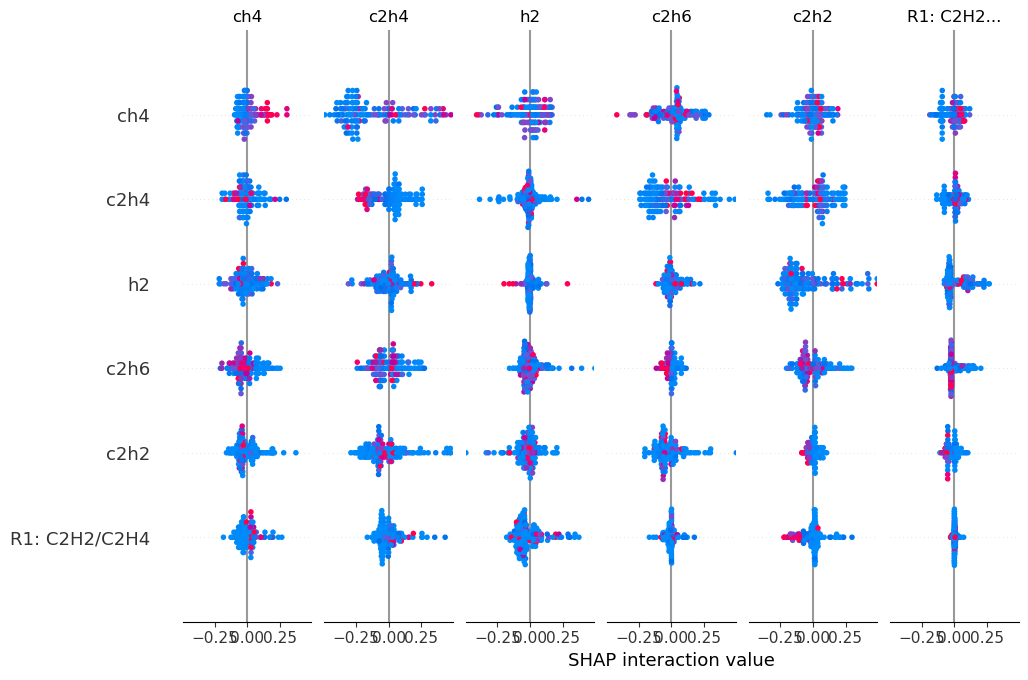

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt
import numpy as np
from pyswarm import pso

# 1. 加载数据
# 假设 david_train_data 和 david_test_data 已经加载
X_train = david_train_data.drop('act', axis=1)
y_train = david_train_data['act']
X_test = david_test_data.drop('act', axis=1)
y_test = david_test_data['act']

# 2. 定义目标函数（适应度函数）
def objective_function(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])

    model = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # PSO 最小化目标函数，因此返回负准确率

# 3. 定义超参数的搜索空间
lb = [10, 3]  # 超参数下界 (n_estimators, max_depth)
ub = [200, 20] # 超参数上界 (n_estimators, max_depth)

# 4. 运行 PSO 优化
xopt, fopt = pso(objective_function, lb, ub, swarmsize=50, maxiter=100)

# 5. 使用优化后的超参数训练最终模型
best_n_estimators = int(xopt[0])
best_max_depth = int(xopt[1])
final_model = ExtraTreesClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

# 6. 评估最终模型
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Optimized Accuracy: {accuracy_final}")
print(classification_report(y_test, y_pred_final))

# 7. SHAP 分析 (使用最终模型)
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=final_model.classes_)
plt.show()

# 8. 可视化其他SHAP图
# shap.dependence_plot("feature_name", shap_values, X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

类别3需要注意，可以尝试增加此类别的训练样本，或者调整模型的超参数，来提高该类别预测精度。

类别4和类别6需要注意召回率，可以尝试增加该类别的训练样本，或者调整模型的超参数，来提高该类别召回率。

In [49]:
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 34
Best max_depth: 17


Stopping search: maximum iterations reached --> 500
Optimized Accuracy: 0.9
              precision    recall  f1-score   support

           1       0.88      0.85      0.86        26
           2       0.95      0.96      0.96        57
           3       0.68      0.81      0.74        21
           4       1.00      0.86      0.93        29
           5       0.93      1.00      0.97        14
           6       0.92      0.85      0.88        13

    accuracy                           0.90       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.91      0.90      0.90       160

Best n_estimators: 192
Best max_depth: 18


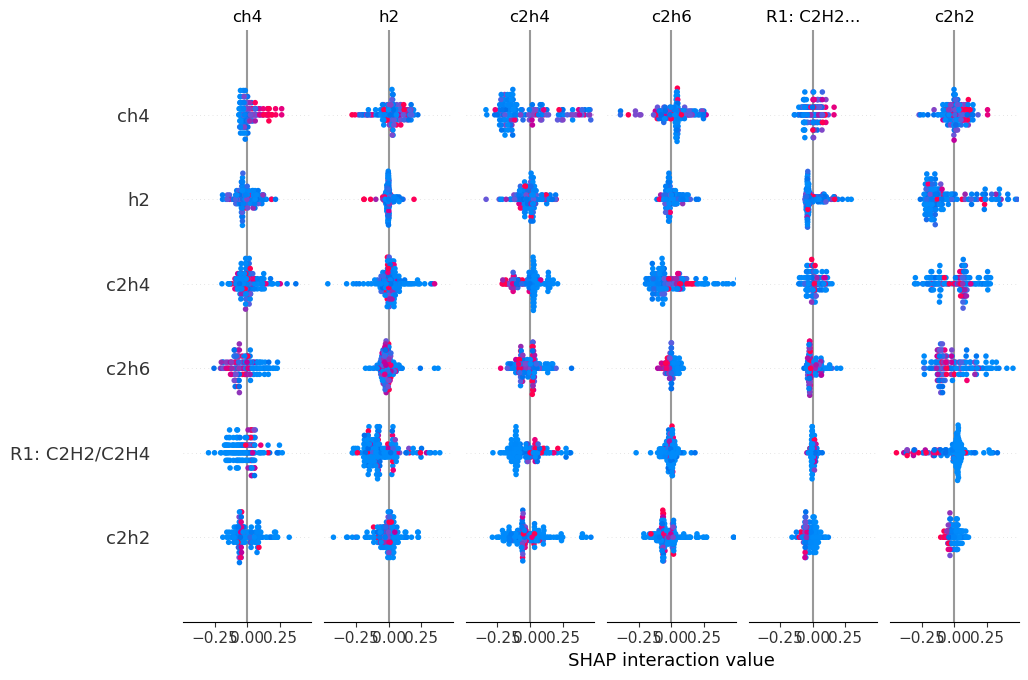

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt
import numpy as np
from pyswarm import pso
from imblearn.over_sampling import ADASYN

# 1. 加载数据
# 假设 david_train_data 和 david_test_data 已经加载
X_train = david_train_data.drop('act', axis=1)
y_train = david_train_data['act']
X_test = david_test_data.drop('act', axis=1)
y_test = david_test_data['act']

# 2. ADASYN 过采样
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# 3. 定义目标函数（适应度函数）
def objective_function(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])

    model = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)  # 使用过采样后的数据
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # PSO 最小化目标函数，因此返回负准确率

# 4. 定义超参数的搜索空间
lb = [10, 3]  # 超参数下界 (n_estimators, max_depth)
ub = [200, 20] # 超参数上界 (n_estimators, max_depth)

# 5. 运行 PSO 优化
xopt, fopt = pso(objective_function, lb, ub, swarmsize=50, maxiter=500)

# 6. 使用优化后的超参数训练最终模型
best_n_estimators = int(xopt[0])
best_max_depth = int(xopt[1])
final_model = ExtraTreesClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
final_model.fit(X_train_resampled, y_train_resampled)  # 使用过采样后的数据
y_pred_final = final_model.predict(X_test)

# 7. 评估最终模型
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Optimized Accuracy: {accuracy_final}")
print(classification_report(y_test, y_pred_final))

# 输出最佳模型参数
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best max_depth: {best_max_depth}")

# 8. SHAP 分析 (使用最终模型)
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=final_model.classes_)
plt.show()


In [ ]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)
shap.dependence_plot("feature_name", shap_values, X_test)
plt.show()

#shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

ValueError: Could not find feature named: feature_name